In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import torch
warnings.filterwarnings("ignore")

**upload the data**

In [162]:
from datasets import load_dataset ,Dataset
import pandas as pd 
dataset=pd.read_csv('/kaggle/input/question-pairs-dataset/questions.csv')


In [163]:
dataset

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


pick the same number of each label (blance_data)

In [164]:
dataset1=dataset[dataset['is_duplicate']==0].sample(15000,random_state=41)
dataset2=dataset[dataset['is_duplicate']==1].sample(15000,random_state=41)
dataset=pd.concat([dataset1,dataset2],axis=0)
dataset

,id,qid1,qid2,question1,question2,is_duplicate
263897,263897,519228,519229,How do you delete a question or an answer on Q...,How do I delete my own question from Quora?,0
315911,315911,619938,619939,What is Linux.lxr. no?,What is Linux?,0
143636,143636,284264,92933,What is the ultimate answer to why we exist?,"Why and how is 42 the answer to life, the univ...",0
337137,337137,660963,660964,If a guy ejaculates in you can you taste it?,Is it wrong to be friends with a guy you know ...,0
107342,107342,212885,212886,How can I get into NYU?,How did you get into NYU?,0
...,...,...,...,...,...,...
53312,53312,106088,106089,Why are Muslims prohibited to eat pork?,Do Muslims eat pork?,1
334077,334077,655034,655035,Does frequent masturbation affect sperm quality?,Can frequent masturbation (once in a day) for ...,1
190078,190078,375273,375274,Is it too late to be a programmer if I am alre...,Am I too late to start Programming at 22?,1
84386,84386,167597,167598,Which answer got the most upvotes on Quora?,What is a top voted answer on Quora?,1


In [165]:
dataset=dataset.reset_index(drop=True)

In [166]:
dataset['is_duplicate'].value_counts()

is_duplicate
0    15000
1    15000
Name: count, dtype: int64

In [167]:
dataset.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [168]:
dataset.dropna(inplace=True)

In [169]:
def preprocessing(df):
    for col in ['question1', 'question2']:
        df = df[df[col].notna()]
        df[col] = df[col].apply(lambda x: x.lower())
        df[col] = df[col].astype(str).str.strip().apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))
    
    df = df[df['question1'] != '']
    df = df[df['question2'] != '']
    df = df.drop_duplicates(subset=['question1', 'question2'])
    
    return df

dataset = preprocessing(dataset)

In [173]:
dataset

,id,qid1,qid2,question1,question2,is_duplicate
0,263897,519228,519229,how do you delete a question or an answer on q...,how do i delete my own question from quora,0
1,315911,619938,619939,what is linuxlxr no,what is linux,0
2,143636,284264,92933,what is the ultimate answer to why we exist,why and how is 42 the answer to life the unive...,0
3,337137,660963,660964,if a guy ejaculates in you can you taste it,is it wrong to be friends with a guy you know ...,0
4,107342,212885,212886,how can i get into nyu,how did you get into nyu,0
...,...,...,...,...,...,...
29995,53312,106088,106089,why are muslims prohibited to eat pork,do muslims eat pork,1
29996,334077,655034,655035,does frequent masturbation affect sperm quality,can frequent masturbation once in a day for se...,1
29997,190078,375273,375274,is it too late to be a programmer if i am alre...,am i too late to start programming at 22,1
29998,84386,167597,167598,which answer got the most upvotes on quora,what is a top voted answer on quora,1


In [176]:
dataset['question1'][0]

'how do you delete a question or an answer on quora'

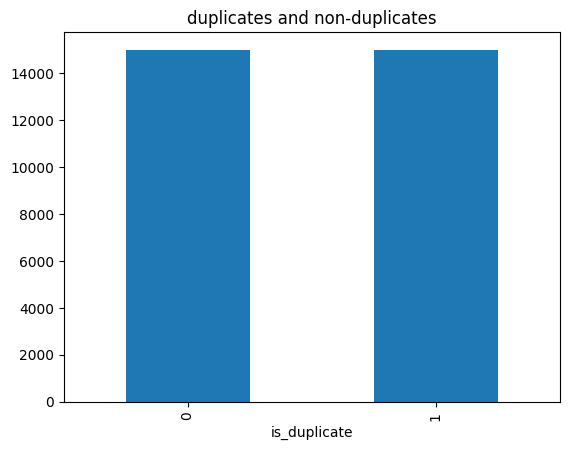

In [11]:
dataset['is_duplicate'].value_counts().plot(kind='bar',title='duplicates and non-duplicates')
plt.show()

count unique and repeated questions

In [20]:
#how many questions repeated 
qid=pd.Series(dataset['qid1'].tolist()+dataset['qid2'].tolist())
print("number of unique questions",np.unique(qid).shape[0])
x=qid.value_counts()>1
print(x[x].shape[0])

number of unique questions 59817
142


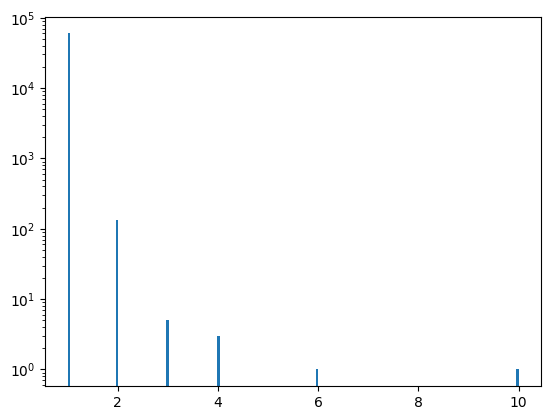

In [21]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale("log")
plt.show()

In [22]:
dataset['q1_len']=dataset['question1'].str.len()
dataset['q2_len']=dataset['question2'].str.len()
dataset['q1_len'].value_counts()

dataset['q1_word_len']=dataset['question1'].apply(lambda x: len(x.split()))
dataset['q2_word_len']=dataset['question2'].apply(lambda x: len(x.split()))
dataset

,index,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_len,q2_word_len
0,263897,263897,519228,519229,how do you delete a question or an answer on q...,how do i delete my own question from quora,0,50,42,11,9
1,315911,315911,619938,619939,what is linuxlxr no,what is linux,0,19,13,4,3
2,143636,143636,284264,92933,what is the ultimate answer to why we exist,why and how is 42 the answer to life the unive...,0,43,64,9,13
3,337137,337137,660963,660964,if a guy ejaculates in you can you taste it,is it wrong to be friends with a guy you know ...,0,43,134,10,27
4,107342,107342,212885,212886,how can i get into nyu,how did you get into nyu,0,22,24,6,6
...,...,...,...,...,...,...,...,...,...,...,...
29995,53312,53312,106088,106089,why are muslims prohibited to eat pork,do muslims eat pork,1,38,19,7,4
29996,334077,334077,655034,655035,does frequent masturbation affect sperm quality,can frequent masturbation once in a day for se...,1,47,80,6,14
29997,190078,190078,375273,375274,is it too late to be a programmer if i am alre...,am i too late to start programming at 22,1,52,40,13,9
29998,84386,84386,167597,167598,which answer got the most upvotes on quora,what is a top voted answer on quora,1,42,35,8,8


In [23]:
print(dataset['question1'][29997])
print(dataset['question2'][29997])
print(dataset['is_duplicate'][29997])

is it too late to be a programmer if i am already 22
am i too late to start programming at 22
1


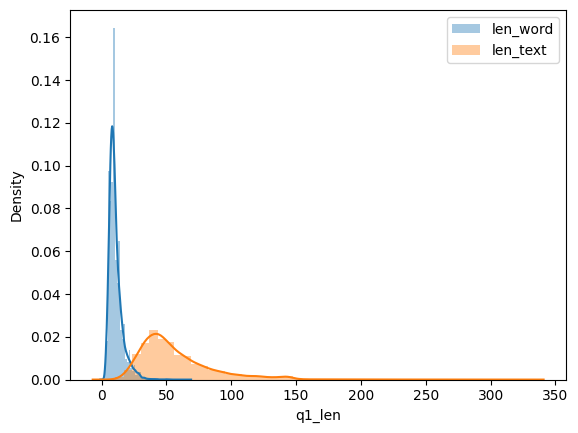

In [24]:
sns.distplot(dataset['q1_word_len'],label="len_word")
sns.distplot(dataset['q1_len'],label="len_text")
plt.legend()
plt.show()

In [25]:
maxlen1= dataset["q1_word_len"].max()
maxlen2= dataset["q2_word_len"].max()

In [30]:
mean1=dataset['q1_word_len'].mean()
mean2=dataset['q1_word_len'].mean()
mean2

10.712280350771898

In [32]:
%pip install --quiet transformers accelerate evaluate datasets peft

Note: you may need to restart the kernel to use updated packages.


In [33]:
import transformers
import peft
print(transformers.__version__)
print(peft.__version__)

4.45.1
0.14.0


In [22]:
# # Update the libraries (if necessary)
# !pip install --upgrade transformers peft


In [46]:
    from transformers import AutoTokenizer, AutoModelForSequenceClassification
    from peft import get_peft_model, LoraConfig,TaskType
    
    model_path = "/kaggle/input/bga_ranker/pytorch/default/1/bga_ranker" # this can be swapped with other Hugging Face models
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)


In [47]:
encoded = tokenizer(dataset['question1'].tolist(), 
                   dataset['question2'].tolist(), 
                   truncation=True)
max_len = max(len(seq) for seq in encoded['input_ids'])
print(f"Maximum sequence length: {max_len}")

Maximum sequence length: 149


In [48]:
model

XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=1024, ou

In [49]:
def print_trainable_parameters(model, label):
    parameters, trainable = 0, 0
    
    for _, p in model.named_parameters():
        parameters += p.numel()
        trainable += p.numel() if p.requires_grad else 0

    print(f"{label} trainable parameters: {trainable:,}/{parameters:,} ({100 * trainable / parameters:.2f}%)")

In [50]:
print_trainable_parameters(model,label="model")

model trainable parameters: 559,891,457/559,891,457 (100.00%)


In [51]:
# Check trainable parameters in the base model (should be 0 if frozen)
trainable_params_base = [p for p in model.parameters() if p.requires_grad]
print(f"Trainable parameters in base model: {len(trainable_params_base)}")


Trainable parameters in base model: 393


In [52]:
# Freeze all the parameters in the base model
for param in model.roberta.parameters():
    param.requires_grad = False

# Freeze the classifier parameters
for param in model.classifier.parameters():
    param.requires_grad = False


In [53]:
# Check trainable parameters in the base model (should be 0 if frozen)
trainable_params_base = [p for p in model.parameters() if p.requires_grad]
print(f"Trainable parameters in base model: {len(trainable_params_base)}")


Trainable parameters in base model: 0


In [54]:
lora_config = LoraConfig(
    r=16,            # Increase rank for better expressiveness
    lora_alpha=32,   # Scale with r
    lora_dropout=0.05,  # Lower dropout since dataset isn't huge
    task_type='SEQ_CLS',
    bias="none"      # Add this to reduce parameters
)

In [55]:
peftmodel = get_peft_model(model, lora_config)

In [56]:
print_trainable_parameters(peftmodel,label="peft_model")

peft_model trainable parameters: 2,623,489/562,514,946 (0.47%)


In [33]:
# for name, param in peftmodel.named_parameters():
#     if param.requires_grad:
#         print(name)


In [34]:
# for name, param in peftmodel.model.named_parameters():
#     if param.requires_grad:
#         print(f"{name} requires_grad={param.requires_grad}")


In [58]:
from sklearn.model_selection import train_test_split
X=list(zip(dataset['question1'],dataset['question2']))
y=dataset['is_duplicate']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=dataset['is_duplicate'])

In [59]:

y_train_list=y_train.tolist()
y_test_list=y_test.tolist()

In [115]:
(x_train)

[('what is the black knight satellite',
  'what are some facts about the black knight satellite'),
 ('what can be the most insane ways to commit suicide',
  'what are some painless ways to commit suicide'),
 ('how does i develop self confidence', 'how can i improve my confidence'),
 ('how does it feel to be a machine learning enthusiast',
  'what does it take to do a phd at oxford in machine learning'),
 ('is apple abandoning the macbook pro',
  'will apple stop making the macbook pro'),
 ('why doesnt icici bank send sms for transactions smaller than 5000 inr done without a debit card',
  'which icici debit card supports paypal'),
 ('which was the best movie of bollywood in 2016',
  'what is your favorite bollywood movie in 2016'),
 ('card services lower interest rates',
  'has anyone earned from instagc is it genuine'),
 ('can i sue quora', 'how do i sue quora'),
 ('which ib subjects should i choose',
  'would doing a congressional internship help me get a white house internship in th

In [117]:
import torch
from torch.utils.data import Dataset


# Assuming x_train_list and x_test_list are the raw text data
class QuetionPairs(Dataset):
  def __init__(self,x,y,tokenizer,max_length=160):
    self.pairs=x
    self.labels=y
    self.tokenizer=tokenizer
    self.max_length=max_length
  
  
  def __len__(self):
    return(len(self.labels))
  def __getitem__(self,idx):
    question1,question2=self.pairs[idx]
    label=self.labels.iloc[idx]
    tokenizer=self.tokenizer
      
    encoding = tokenizer(
    text=question1,
    text_pair=question2,
    padding="max_length",
    truncation=True,
    return_tensors="pt",
    max_length=self.max_length
    )
    return{
        "input_ids": encoding['input_ids'].squeeze(0),
        "attention_mask": encoding['attention_mask'].squeeze(0),
        "token_type_ids": encoding.get('token_type_ids', torch.zeros(self.max_length, dtype=torch.long)).squeeze(0),
        "label":torch.tensor(label,dtype=torch.float32)
    }






In [62]:
train_dataset=QuetionPairs(x_train,y_train,tokenizer)
test_dataset=QuetionPairs(x_test,y_test,tokenizer)

In [63]:
len(train_dataset)

23992

In [41]:
train_dataset[21115]

{'input_ids': tensor([    0,  4865,   621, 38280,   111,   959,  8035,    23,    10, 76755,
           678,  2499, 48948,    32,     2,     2,  4865,   621,    70, 38280,
           111,   959, 20949,  3934,    10, 76755,    32,     2,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 

In [64]:
device=torch.device('cuda'if torch.cuda.is_available() else "cpu")
print("Using device:", device)
peftmodel=peftmodel.to(device)


peftmodel.eval()

sample = train_dataset[21115]
input_ids = sample['input_ids'].unsqueeze(0).to(device)  # Add batch dimension if necessary
attention_mask = sample['attention_mask'].unsqueeze(0).to(device)

# Forward pass without gradient computation
with torch.no_grad():
    output =peftmodel(input_ids=input_ids, attention_mask=attention_mask)




  # Ensure this is on GPU
print("Output shape:", output)

Using device: cuda
Output shape: SequenceClassifierOutput(loss=None, logits=tensor([[2.1554]], device='cuda:0'), hidden_states=None, attentions=None)


In [43]:
# y_train_float=[float(label)for label in y_train_list]
# y_test_float=[float(label)for label in y_test_list]

In [44]:
# import torch
# y_train_torch=torch.tensor(y_train_float,dtype=torch.float32)
# y_test_torch=torch.tensor(y_test_float,dtype=torch.float32)

In [45]:
    
    # train_dataset = Dataset.from_dict({
    #     'input_ids': train_encodings['input_ids'],
    #     'attention_mask': train_encodings['attention_mask'],
    #     'labels':y_train_torch
    # })
    
    # test_dataset = Dataset.from_dict({
    #     'input_ids': test_encodings['input_ids'],
    #     'attention_mask': test_encodings['attention_mask'],
    #     'labels':y_test_torch
    # })
    
        
    


In [114]:
train_dataset[0]

{'input_ids': tensor([    0,  2367,    83,    70, 22556,   472, 54350, 99675,    13,     2,
             2,  2367,   621,  3060, 15824,     7,  1672,    70, 22556,   472,
         54350, 99675,    13,     2,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,   

In [47]:
# import os
# os.environ["TOKENIZERS_PARALLELISM"] = "false"



In [65]:
pip install -U accelerate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 7.8 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2
Note: you may need to restart the kernel to use updated packages.


In [49]:
# pip install torch==2.5.1 torchvision==0.14.0


In [50]:
# pip install torchvision --upgrade


In [66]:
from accelerate import Accelerator
from transformers import Trainer, TrainingArguments
accelerator = Accelerator()



In [67]:
import torch
torch.cuda.empty_cache()


In [76]:
from sklearn.metrics import accuracy_score, f1_score
from transformers import TrainingArguments, Trainer



def compute_metrics(eval_pred):
    logits, y = eval_pred
    # Apply sigmoid since the classifier doesn't include it
    predictions = (sigmoid(logits.squeeze()) > 0.5).astype(int)
    
    acc = accuracy_score(y, predictions)
    f1 = f1_score(y, predictions)
    
    return {
        "accuracy": acc,
        "f1": f1,
    }

def sigmoid(x):
    # Clip to avoid overflow
    x = np.clip(x, -100, 100)
    return 1 / (1 + np.exp(-x))

# Training arguments
training_args = TrainingArguments(
    output_dir='./bga_ranker',
    eval_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=5,
    per_device_train_batch_size=8,
    report_to='wandb',
    logging_dir='./logs',
    logging_steps=100,
    fp16=True,  # Enable mixed precision training
)

# Define the Trainer
trainer = Trainer(
    model=peftmodel,                    # The model to train
    args=training_args,             # Training arguments
    train_dataset=train_dataset,    # Training dataset
    eval_dataset=test_dataset,      # Validation dataset
    tokenizer=tokenizer,            # Tokenizer
    compute_metrics=compute_metrics # Add compute_metrics function here
)
trainer.train(resume_from_checkpoint='/kaggle/working/bga_ranker/checkpoint-11996')


Epoch,Training Loss,Validation Loss,Accuracy,F1
5,0.098500,0.105781,0.785798,0.821652


TrainOutput(global_step=14995, training_loss=0.02037694846919951, metrics={'train_runtime': 1058.5572, 'train_samples_per_second': 113.324, 'train_steps_per_second': 14.166, 'total_flos': 3.52377841329408e+16, 'train_loss': 0.02037694846919951, 'epoch': 5.0})

In [92]:
model.save_pretrained("/kaggle/working/finetuned_model")
tokenizer.save_pretrained("/kaggle/working/finetuned_model")

('/kaggle/working/finetuned_model/tokenizer_config.json',
 '/kaggle/working/finetuned_model/special_tokens_map.json',
 '/kaggle/working/finetuned_model/sentencepiece.bpe.model',
 '/kaggle/working/finetuned_model/added_tokens.json',
 '/kaggle/working/finetuned_model/tokenizer.json')

In [210]:
def customdispaly(df,idx):
    print(f"{df['question1'][idx]}\n\n{df['question2'][idx]} \n {df['is_duplicate'][idx]}")

In [215]:
customdispaly(dataset,21711)

how much water should a normal healthy adult drink on a daily basis to avoid dehydration

how much water drink per day 
 1


In [216]:
from transformers import pipeline
import logging
logging.getLogger("transformers").setLevel(logging.ERROR)

question1='how much water should a normal healthy adult drink on a daily basis to avoid dehydration'
question2='how much water drink per day '
# Load the fine-tuned model
finetuned_model = AutoModelForSequenceClassification.from_pretrained("./finetuned_model")
finetuned_tokenizer = AutoTokenizer.from_pretrained("./finetuned_model")
finetuned_model.to(device)

new_questions = [(question1,question2)]
new_labels = pd.Series(1)  # This is just for evaluation purposes; it's optional for prediction

# Create a dataset instance for the new data
new_dataset = QuetionPairs(new_questions, new_labels, tokenizer)
from torch.utils.data import DataLoader

# Create a DataLoader for batching during prediction
batch_size = 16  # You can adjust this depending on your available memory
dataloader = DataLoader(new_dataset, batch_size=batch_size, shuffle=False)
import torch

# Set the model to evaluation mode
finetuned_model.eval()

# Define a list to store predictions
predictions = []

# Use a context manager to disable gradient calculation
with torch.no_grad():
    for batch in dataloader:
        # Get the input IDs and attention masks from the batch
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)

        
        # Forward pass through the model
        outputs = finetuned_model(input_ids=input_ids, 
                         attention_mask=attention_mask, 
                         token_type_ids=token_type_ids)
        
        # Get the logits (raw predictions) from the output
        logits = outputs.logits
        
        # Apply a sigmoid function to the logits (assuming binary classification)
        preds = torch.sigmoid(logits).squeeze().cpu().numpy()
        if preds.ndim==0:
            preds=[preds.item()]
        # Store the predictions
        predictions.extend(preds)
        predictions=[1 if x >=0.5 else 0 for x in predictions] 
    print(predictions)
    


[1]


In [219]:
!git clone https://github.com/bassommma/question-pairs.git

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Cloning into 'question-pairs'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), done.


In [222]:
!cp /kaggle/working/questionpair-duplicate.ipynb /kaggle/working/question-pairs/


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


cp: cannot stat '/kaggle/working/questionpair-duplicate.ipynb': No such file or directory


In [ ]:
%cd /kaggle/working/your-repository-name/
!git add .


In [ ]:
!git commit -m "Initial commit with code from Kaggle"
    

In [ ]:
!git push origin main
    